# Data Science in Economics and Business - Class Project
In this class project, you are supposed to work with GDP data taken from the International Monetary Fund.

**IMPORTANT:** <br>
Please enter the matriculation number of all group members here:
1. 2876118
2. 2827696
3. ZZZZZZ

In this class project, you will use the different techniques taught in the course: data handling, data visualization, and machine learning.

First load the necessary packages. <br>
If you want to use additional libraries you can add them to the following cell:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import folium
from folium.plugins import MarkerCluster

# Problem 1 - Data Handling
The basis of your work will be the following GDP dataset:

set index year to the table

In [2]:
gdp = pd.read_csv("GDP_IMF.csv", sep=";")
gdp
gdp = gdp.set_index(["year"])
gdp

,Country,GDP
year,,
1992,Afghanistan,no data
1992,Albania,0.843
1992,Algeria,49.217
1992,Andorra,no data
1992,Angola,9.395
...,...,...
2028,Major advanced economies (G7),55430.066
2028,Middle East and Central Asia,5929.627
2028,Other advanced economies,10783.151


#### a)
As you can see, there are many missing values in the data. <br>
Before you can continue, you need to handle them. Proceed as follows:
- Delete those countries with no data at all (if any)
- Either delete the missing years for each country or use the years close by to approximate the missing value <br> *Example: Year 2004 is missing, but 2003 and 2005 are available; use the mean of GDP in 2003 and 2005 to replace missing year 2004.*

replace the no data item to NaN, which is convient to deal afterwards
convert it to pivot table,year as index

In [3]:
gdp["GDP"] = gdp["GDP"].replace("no data", float("nan"))
gdp
pivot_gdp = gdp.pivot_table(index="year", columns="Country", values="GDP")
pivot_gdp=pivot_gdp.sort_index()
pivot_gdp

Country,ASEAN-5,Advanced economies,Afghanistan,Africa (Region),Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,...,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Europe,Western Hemisphere (Region),World,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1992,460.862,21156.842,NaN,604.244,0.843,49.217,NaN,9.395,0.499,255.787,...,0.209,60.4,12.528,NaN,8826.228,8519.857,25317.144,17.959,3.614,7.793
1993,515.309,21322.601,NaN,605.136,1.461,50.963,NaN,6.819,0.535,264.429,...,0.2,59.865,16.736,NaN,8019.594,9019.006,26037.126,21.737,3.549,7.569
1994,588.397,22895.932,NaN,593.589,2.361,42.426,NaN,4.965,0.589,287.835,...,0.234,58.357,20.712,2.843,8510.142,9670.139,27989.36,28.019,3.657,7.959
1995,682.591,25360.404,NaN,705.236,2.882,42.066,NaN,6.197,0.577,288.497,...,0.249,77.427,26.407,3.283,9763.93,10184.186,31209.775,12.796,3.799,8.263
1996,758.554,25538.353,NaN,787.203,3.2,46.941,NaN,7.994,0.634,304.282,...,0.261,70.536,31.352,3.41,9947.131,10808.314,32078.117,6.496,3.599,10.117
1997,713.871,25041.07,NaN,816.984,2.259,48.178,NaN,9.388,0.681,327.436,...,0.273,85.684,34.146,3.76,9353.567,11536.444,31993.03,6.838,4.303,10.386
1998,467.853,25132.372,NaN,825.778,2.56,48.188,NaN,7.958,0.728,334.244,...,0.262,91.836,34.58,4.068,9647.605,12021.595,31836.9,6.322,3.538,12.099
1999,553.827,26465.873,NaN,683.407,3.209,48.845,NaN,7.526,0.766,316.998,...,0.268,97.517,36.444,4.271,9661.137,12403.261,32965.257,7.639,3.405,11.769
2000,587.507,26923.495,NaN,703.55,3.483,54.749,1.429,11.166,0.826,317.759,...,0.272,117.596,39.585,4.314,8982.569,13282.918,34056.849,9.679,3.601,11.34


deleta the missing years, we can see it obviously from 1992 to 2002 there are many missing values, since the nearest data also far away, its not suitable to use the nearest data to filled the blank.
several missing values in 2020 nearby,its reasonable to fill with passing year value

In [4]:
pivot_gdp = pivot_gdp.drop(pivot_gdp[pivot_gdp.index <2002].index)
pivot_gdp
pivot_gdp = pivot_gdp.ffill(axis=0)
pivot_gdp

Country,ASEAN-5,Advanced economies,Afghanistan,Africa (Region),Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,...,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Europe,Western Hemisphere (Region),World,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
2002,633.662,27801.726,4.367,695.907,4.348,56.761,1.758,15.286,0.814,112.458,...,0.262,95.258,44.563,3.556,9855.438,13682.887,34917.475,10.693,4.194,10.735
2003,712.280,31188.262,4.553,839.674,5.611,67.864,2.362,17.813,0.856,142.431,...,0.315,83.684,50.233,3.968,11959.121,14382.857,39211.890,11.778,4.902,9.574
2004,798.212,34600.427,5.146,1005.614,7.185,85.332,2.896,23.552,0.920,164.911,...,0.365,112.254,62.877,4.603,13760.445,15567.387,44137.064,13.868,6.221,9.465
2005,885.483,36404.895,6.167,1182.626,8.052,103.198,3.158,36.971,1.023,199.273,...,0.390,143.375,73.197,5.126,14325.385,17023.355,47810.121,16.732,8.329,9.046
2006,1064.665,38277.589,6.925,1364.207,8.896,117.027,3.456,52.381,1.158,232.892,...,0.435,178.521,84.301,5.348,15234.770,18422.967,51778.045,19.063,12.762,8.141
2007,1272.943,41815.228,8.556,1585.381,10.677,134.977,3.952,65.266,1.313,287.921,...,0.517,232.857,98.426,5.816,17476.193,19830.559,58452.140,21.651,14.060,7.785
2008,1466.256,44180.539,10.297,1854.675,12.881,171.001,4.082,88.539,1.370,363.545,...,0.582,306.764,124.756,7.310,18779.229,20841.085,64160.756,26.911,17.914,6.707
2009,1441.247,41675.453,12.066,1761.757,12.044,137.211,3.675,70.307,1.228,334.633,...,0.590,268.624,129.022,8.086,16843.299,20044.972,60776.594,25.130,15.332,9.666
2010,1803.204,43526.516,15.325,2059.945,11.937,161.207,3.446,83.799,1.149,424.729,...,0.652,318.281,143.212,9.682,16791.924,21871.919,66487.951,30.907,20.264,12.042


#### b)
We are only interested in the data on a country level and for years already passed. <br>
The dataset, however, also contains information on whole regions such as the EU or G7. <br>
It also contains predictions for GDP in the upcoming years. <br>
Delete these observations from the data. <br>
*Hint: Get a list of all unique values of the Country column.*

delete the years not coming,year>2023

In [5]:
pivot_gdp = pivot_gdp.drop(pivot_gdp[pivot_gdp.index > 2023].index)
pivot_gdp

Country,ASEAN-5,Advanced economies,Afghanistan,Africa (Region),Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,...,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Europe,Western Hemisphere (Region),World,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
2002,633.662,27801.726,4.367,695.907,4.348,56.761,1.758,15.286,0.814,112.458,...,0.262,95.258,44.563,3.556,9855.438,13682.887,34917.475,10.693,4.194,10.735
2003,712.280,31188.262,4.553,839.674,5.611,67.864,2.362,17.813,0.856,142.431,...,0.315,83.684,50.233,3.968,11959.121,14382.857,39211.890,11.778,4.902,9.574
2004,798.212,34600.427,5.146,1005.614,7.185,85.332,2.896,23.552,0.920,164.911,...,0.365,112.254,62.877,4.603,13760.445,15567.387,44137.064,13.868,6.221,9.465
2005,885.483,36404.895,6.167,1182.626,8.052,103.198,3.158,36.971,1.023,199.273,...,0.390,143.375,73.197,5.126,14325.385,17023.355,47810.121,16.732,8.329,9.046
2006,1064.665,38277.589,6.925,1364.207,8.896,117.027,3.456,52.381,1.158,232.892,...,0.435,178.521,84.301,5.348,15234.770,18422.967,51778.045,19.063,12.762,8.141
2007,1272.943,41815.228,8.556,1585.381,10.677,134.977,3.952,65.266,1.313,287.921,...,0.517,232.857,98.426,5.816,17476.193,19830.559,58452.140,21.651,14.060,7.785
2008,1466.256,44180.539,10.297,1854.675,12.881,171.001,4.082,88.539,1.370,363.545,...,0.582,306.764,124.756,7.310,18779.229,20841.085,64160.756,26.911,17.914,6.707
2009,1441.247,41675.453,12.066,1761.757,12.044,137.211,3.675,70.307,1.228,334.633,...,0.590,268.624,129.022,8.086,16843.299,20044.972,60776.594,25.130,15.332,9.666
2010,1803.204,43526.516,15.325,2059.945,11.937,161.207,3.446,83.799,1.149,424.729,...,0.652,318.281,143.212,9.682,16791.924,21871.919,66487.951,30.907,20.264,12.042


check the unique items, keep the countries items,after the Zimbabwe are all area items

In [6]:
unique_countries = gdp["Country"].unique()
print(unique_countries)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' "China, People's Republic of"
 'Colombia' 'Comoros' 'Congo, Dem. Rep. of the' 'Congo, Republic of '
 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' "Cote d'Ivoire"
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia, The' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hong Kong SAR' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'I

delete the area columns

In [7]:
columns_to_delete = ['Africa (Region)', 'Asia and Pacific', 'Australia and New Zealand', 'Caribbean',
                  'Central America', 'Central Asia and the Caucasus', 'East Asia', 'Eastern Europe ',
                  'Europe', 'Middle East (Region)', 'North Africa', 'North America', 'Pacific Islands ',
                  'South America', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa (Region) ',
                  'Western Europe', 'Western Hemisphere (Region)', 'ASEAN-5', 'Advanced economies',
                  'Emerging and Developing Asia', 'Emerging and Developing Europe',
                  'Emerging market and developing economies', 'Euro area', 'European Union',
                  'Latin America and the Caribbean', 'Major advanced economies (G7)',
                  'Middle East and Central Asia', 'Other advanced economies', 'Sub-Saharan Africa',
                  'World']
pivot_gdp = pivot_gdp.drop(columns=columns_to_delete)
pivot_gdp


Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
2002,4.367,4.348,56.761,1.758,15.286,0.814,112.458,2.376,1.962,425.288,...,10929.100,14.800,12.106,0.262,95.258,44.563,3.556,10.693,4.194,10.735
2003,4.553,5.611,67.864,2.362,17.813,0.856,142.431,2.807,2.044,541.063,...,11456.450,13.103,12.697,0.315,83.684,50.233,3.968,11.778,4.902,9.574
2004,5.146,7.185,85.332,2.896,23.552,0.920,164.911,3.577,2.255,658.572,...,12217.175,14.896,15.045,0.365,112.254,62.877,4.603,13.868,6.221,9.465
2005,6.167,8.052,103.198,3.158,36.971,1.023,199.273,4.900,2.360,735.940,...,13039.200,18.905,17.939,0.390,143.375,73.197,5.126,16.732,8.329,9.046
2006,6.925,8.896,117.027,3.456,52.381,1.158,232.892,6.384,2.470,782.797,...,13815.600,21.325,21.344,0.435,178.521,84.301,5.348,19.063,12.762,8.141
2007,8.556,10.677,134.977,3.952,65.266,1.313,287.921,9.206,2.678,949.526,...,14474.250,25.495,27.963,0.517,232.857,98.426,5.816,21.651,14.060,7.785
2008,10.297,12.881,171.001,4.082,88.539,1.370,363.545,11.662,2.843,1056.487,...,14769.850,33.010,35.858,0.582,306.764,124.756,7.310,26.911,17.914,6.707
2009,12.066,12.044,137.211,3.675,70.307,1.228,334.633,8.648,2.554,1000.801,...,14478.050,34.418,41.945,0.590,268.624,129.022,8.086,25.130,15.332,9.666
2010,15.325,11.937,161.207,3.446,83.799,1.149,424.729,9.260,2.454,1254.497,...,15048.975,43.780,49.772,0.652,318.281,143.212,9.682,30.907,20.264,12.042


check if there is a missing value in table,output false means no missing value

In [8]:
missing_values_locations = pivot_gdp.isnull()
has_nan_values = pivot_gdp.loc[2021].isna().any()
print(has_nan_values)

False


# Problem 2 - Data Visualization
#### a)
To get some first insights in the data, create meaningful plots. <br>
You can use any kind that you deem useful: histograms, line plots, etc.

In [9]:
# Insert your code here.
#pick some countires to get the plot...interpretation

I would like to knwow the trend of the major economics countries
so firstly plot a linegraphe including (US,China,Germany,France,UK,Italy,Japan,India)
but only USA and China have clear GDP trend.
so next step is to plot them respectively. after 2020 besides USA China India, the other countries' GDP have in some ways fluctuations.


[]

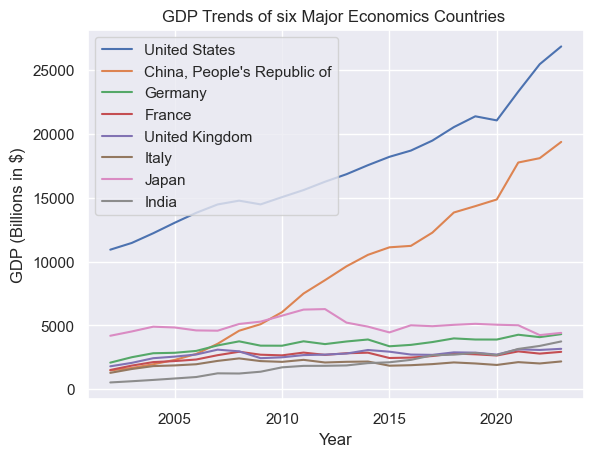

In [10]:
countries = ["United States","China, People's Republic of",'Germany','France','United Kingdom','Italy',"Japan","India"]
gdp_trends = pivot_gdp[countries]
gdp_trends.plot()
plt.xlabel('Year')
plt.ylabel('GDP (Billions in $)')
plt.title('GDP Trends of six Major Economics Countries ')
plt.legend(loc="best")
plt.plot()


In [11]:
countries = ["United States","China, People's Republic of",'Germany','France','United Kingdom','Italy',"Japan","India"]
pivot_gdp_sns=pivot_gdp.reset_index()
pivot_gdp_sns

Country,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,2002,4.367,4.348,56.761,1.758,15.286,0.814,112.458,2.376,1.962,...,10929.100,14.800,12.106,0.262,95.258,44.563,3.556,10.693,4.194,10.735
1,2003,4.553,5.611,67.864,2.362,17.813,0.856,142.431,2.807,2.044,...,11456.450,13.103,12.697,0.315,83.684,50.233,3.968,11.778,4.902,9.574
2,2004,5.146,7.185,85.332,2.896,23.552,0.920,164.911,3.577,2.255,...,12217.175,14.896,15.045,0.365,112.254,62.877,4.603,13.868,6.221,9.465
3,2005,6.167,8.052,103.198,3.158,36.971,1.023,199.273,4.900,2.360,...,13039.200,18.905,17.939,0.390,143.375,73.197,5.126,16.732,8.329,9.046
4,2006,6.925,8.896,117.027,3.456,52.381,1.158,232.892,6.384,2.470,...,13815.600,21.325,21.344,0.435,178.521,84.301,5.348,19.063,12.762,8.141
5,2007,8.556,10.677,134.977,3.952,65.266,1.313,287.921,9.206,2.678,...,14474.250,25.495,27.963,0.517,232.857,98.426,5.816,21.651,14.060,7.785
6,2008,10.297,12.881,171.001,4.082,88.539,1.370,363.545,11.662,2.843,...,14769.850,33.010,35.858,0.582,306.764,124.756,7.310,26.911,17.914,6.707
7,2009,12.066,12.044,137.211,3.675,70.307,1.228,334.633,8.648,2.554,...,14478.050,34.418,41.945,0.590,268.624,129.022,8.086,25.130,15.332,9.666
8,2010,15.325,11.937,161.207,3.446,83.799,1.149,424.729,9.260,2.454,...,15048.975,43.780,49.772,0.652,318.281,143.212,9.682,30.907,20.264,12.042
9,2011,17.890,12.899,200.020,3.625,111.790,1.138,527.644,10.142,2.638,...,15599.725,52.132,60.213,0.738,316.482,171.312,11.186,32.726,23.455,14.100


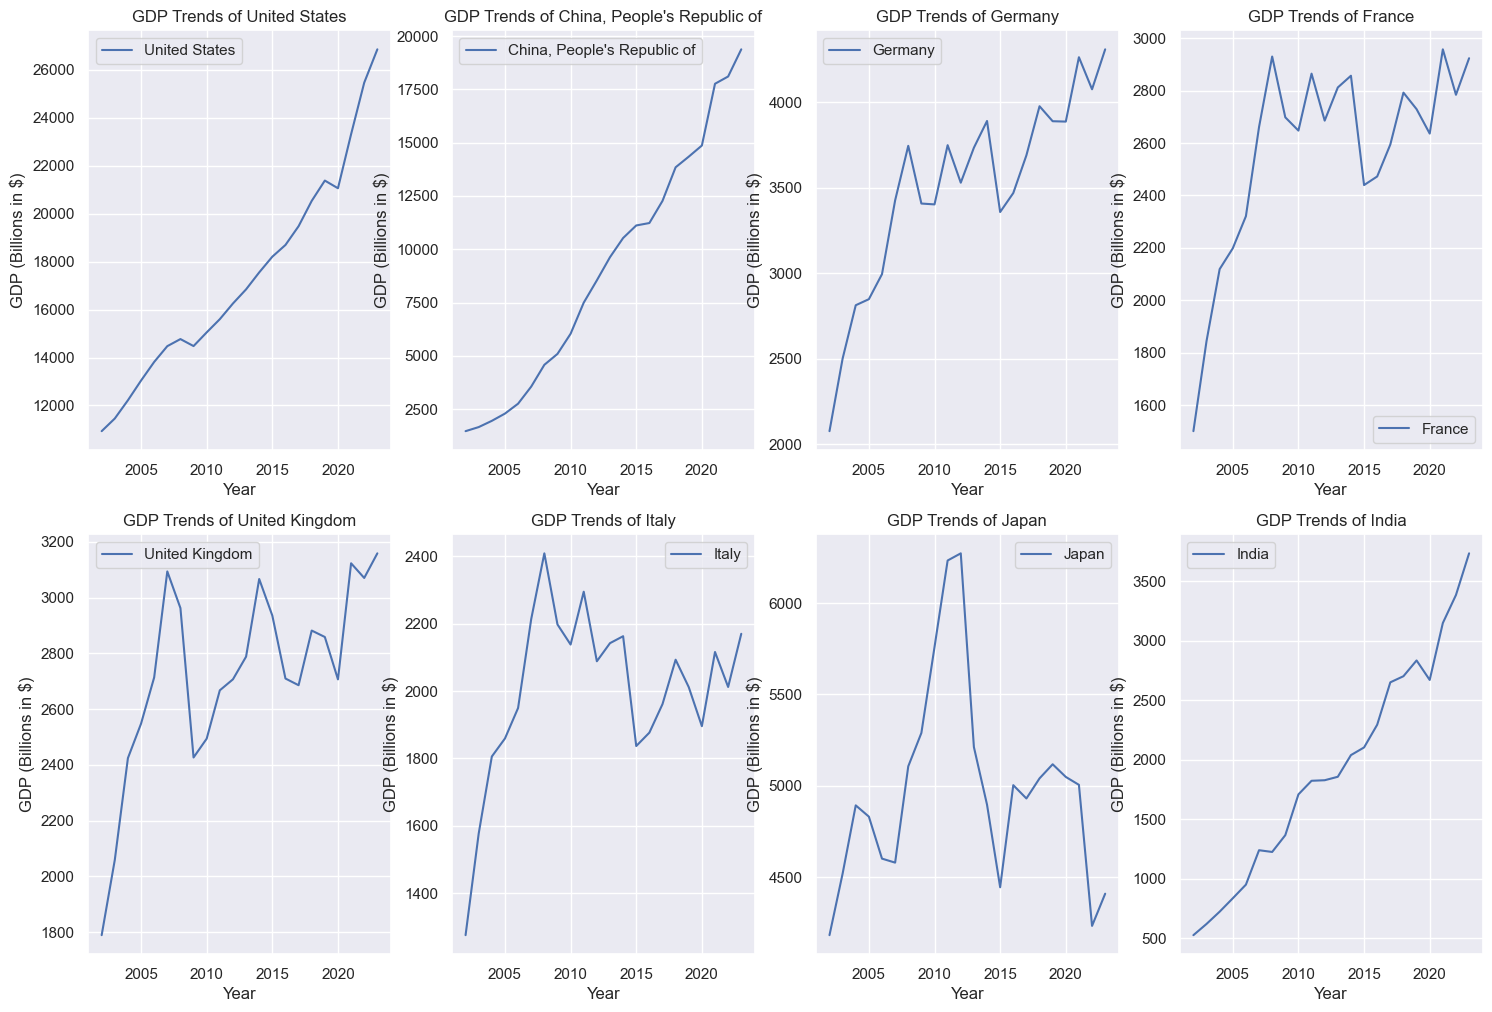

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [12]:
countries = ["United States","China, People's Republic of",'Germany','France','United Kingdom','Italy',"Japan","India"]
pivot_gdp_sns=pivot_gdp.reset_index()
fig, axs = plt.subplots(2, 4, figsize=(18, 12))

def plot_line (x,ax):
    fig=plt.figure(figsize=(12,6))
    gdp_trends = pivot_gdp[x]
    ax.plot(pivot_gdp[x].index,pivot_gdp[x],label=f"{x}")
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP (Billions in $)')
    ax.set_title(f'GDP Trends of {x}')
    ax.legend(loc="best")
    return


for i, country in enumerate(countries):
    plot_line(country, axs[i//4, i%4])

plt.tight_layout()
plt.show()


#### b)
Pick a year with as little missing values as possible. <br>
For this year, create an interactive map with `folium` that tells you the GDP in the country in the given year. <br>
*Hint: Be cautious with country names.*

In [13]:
# Insert your code here.
#pick a year which have whole data, draw a map,get gps location of the country.give the source of data
#datasource:https://github.com/albertyw/avenews/blob/master/old/data/average-latitude-longitude-countries.csv

searching the Laitude Longitude information for each country
Source: lan ING
https://github.com/albertyw/avenews/blob/master/old/data/average-latitude-longitude-countries.csv

In [14]:
map = pd.read_csv("average-latitude-longitude-countries.csv", sep=",")
map


,ISO 3166 Country Code,Country,Latitude,Longitude
0,AD,Andorra,42.50,1.50
1,AE,United Arab Emirates,24.00,54.00
2,AF,Afghanistan,33.00,65.00
3,AG,Antigua and Barbuda,17.05,-61.80
4,AI,Anguilla,18.25,-63.17
...,...,...,...,...
235,YE,Yemen,15.00,48.00
236,YT,Mayotte,-12.83,45.17
237,ZA,South Africa,-29.00,24.00
238,ZM,Zambia,-15.00,30.00


In [15]:
map = map.set_index(["Country"])
map

,ISO 3166 Country Code,Latitude,Longitude
Country,,,
Andorra,AD,42.50,1.50
United Arab Emirates,AE,24.00,54.00
Afghanistan,AF,33.00,65.00
Antigua and Barbuda,AG,17.05,-61.80
Anguilla,AI,18.25,-63.17
...,...,...,...
Yemen,YE,15.00,48.00
Mayotte,YT,-12.83,45.17
South Africa,ZA,-29.00,24.00


combine the country gps information with original GDP table,pick the year 2021

In [16]:
pivot_gdp_transposed_2021=pivot_gdp.loc[2021].T
pivot_gdp_transposed_2021
df_merged = pd.merge(pivot_gdp_transposed_2021, map, on="Country",how="left")
df_merged

,2021,ISO 3166 Country Code,Latitude,Longitude
Country,,,,
Afghanistan,20.136,AF,33.0,65.0
Albania,18.310,AL,41.0,20.0
Algeria,163.138,DZ,28.0,3.0
Andorra,3.330,AD,42.5,1.5
Angola,74.791,AO,-12.5,18.5
...,...,...,...,...
Vietnam,369.736,VN,16.0,106.0
West Bank and Gaza,18.109,NaN,NaN,NaN
Yemen,16.957,YE,15.0,48.0


find the missing value,check

In [17]:
missings = df_merged[df_merged["Latitude"].isnull()].index
not_found = df_merged.loc[missings]
print(not_found.index)

Index(['Bahamas, The', 'Cabo Verde', 'China, People's Republic of',
       'Congo, Dem. Rep. of the', 'Congo, Republic of ', 'Eswatini',
       'Gambia, The', 'Hong Kong SAR', 'Iran', 'Kosovo', 'Kyrgyz Republic',
       'Lao P.D.R.', 'Libya', 'Macao SAR', 'Micronesia, Fed. States of',
       'Moldova', 'North Macedonia ', 'Sao Tome und Principe',
       'Slovak Republic', 'South Sudan, Republic of', 'Syria',
       'Taiwan Province of China', 'Tanzania', 'Timor-Leste',
       'Tuerkiye, Republic of', 'West Bank and Gaza'],
      dtype='object', name='Country')


Manually put the lan,lon information for the missing country,which caused by the difference writing way of the countries
rename the new table columns

In [18]:
df_merged_new=df_merged.rename({"Bahamas, The": "Bahamas",
                     'Cabo Verde':'Cape Verde',
                     "China, People's Republic of":"China",
                     "Congo, Dem. Rep. of the": "Congo [DRC]",
                     'Congo, Republic of ':"Congo [Republic]" ,
                     'Gambia, The':  "Gambia" ,
                     'Hong Kong SAR':"Hong Kong",
                     'Korea, Republic of':"Korea",
                     'Kyrgyz Republic':"Kyrgyzstan",
                     'Lao P.D.R.':"Laos",
                     'Macao SAR':'Macao',
                     'Micronesia, Fed. States of':"Micronesia",
                     'Russian Federation':'Russia',
                     'Slovak Republic':'Slovakia',
                     'Taiwan Province of China':'Taiwan',
                     'Tuerkiye, Republic of' :'Tuerkiye'            
                      })
df_merged_new_2021=df_merged_new[2021]
#merge with renamed table
merged = pd.merge(df_merged_new_2021, map, left_index=True, right_index=True, how="left")
#delete those countries without location data
merged=merged.dropna()
merged.loc["China"]

df_cleaned = merged.dropna().rename(columns={2021:"GDP","ISO 3166 Country Code":"Country Code"})
df_cleaned=df_cleaned.copy()
df_cleaned

,GDP,Country Code,Latitude,Longitude
Country,,,,
Afghanistan,20.136,AF,33.0,65.0
Albania,18.310,AL,41.0,20.0
Algeria,163.138,DZ,28.0,3.0
Andorra,3.330,AD,42.5,1.5
Angola,74.791,AO,-12.5,18.5
...,...,...,...,...
Venezuela,57.148,VE,8.0,-66.0
Vietnam,369.736,VN,16.0,106.0
Yemen,16.957,YE,15.0,48.0


finding the top/least 5 GDP countries to have a sense of GDP value, therefor in putting flags on map step, 
we can use different colors to represent different GDP intervall countries

In [19]:
df_cleaned.sort_values("GDP",ascending=False).head(5)


,GDP,Country Code,Latitude,Longitude
Country,,,,
United States,23315.075,US,38.0,-97.0
China,17759.307,CN,35.0,105.0
Japan,5005.537,JP,36.0,138.0
Germany,4262.767,DE,51.0,9.0
India,3150.307,IN,20.0,77.0


In [20]:
df_cleaned.sort_values("GDP",ascending=True).head(5)

,GDP,Country Code,Latitude,Longitude
Country,,,,
Tuvalu,0.060,TV,-8.00,178.00
Nauru,0.146,NR,-0.53,166.92
Palau,0.225,PW,7.50,134.50
Kiribati,0.228,KI,1.42,173.00
Marshall Islands,0.257,MH,9.00,168.00


insert a world map

In [21]:
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map

put the dollar sign of all the countries on world map, which also contain the information( lan,lon,2021GDP)
using different color to classify the GDP level

In [22]:

colors = ["#FF0D0D", "#FF9611", "#FFFB00", "#67CF3F"]
def get_marker_color(x):
    if x >= 4500:
        color = colors[0]
    elif x >= 2000:
        color = colors[1]
    elif x >= 200:
        color = colors[2]
    else:
        color = colors[3]
    return color


for Country, Latitude, Longitude,GDP  in zip(df_cleaned.index, 
                                            df_cleaned.Latitude, 
                                            df_cleaned.Longitude,
                                            df_cleaned.GDP,
                                           ):
    
    popup = folium.Popup(f"{Country}: <br>{Latitude,Longitude},{GDP}Billions$", max_width=300)
    color = get_marker_color(GDP)
    folium.Marker([Latitude, Longitude], popup=popup, icon=folium.Icon(color="lightgray", icon_color=color,
                                   icon="dollar", prefix="fa")).add_to(world_map)

world_map
    

# Problem 3 - Supervised Machine Learning
#### a)
First, try to predict the GDP in a given year and in a given country using the data from the past years. <br>
Report the performance (measured in mean squared error) for different numbers of lags. 

In [23]:
# Insert your code here.
#using a loop predict every country

using Prediction model: Regression, Decision trees, Random Forests, Gradient Boosting
to choose the best performance model

In [24]:
import statistics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix
import seaborn as sns
sns.set()  
pd.options.mode.chained_assignment = None 

check again the pivot_gdp value,wheather has nan value

In [25]:
pivot_gdp
nan_value_df=pivot_gdp.isnull().sum()
nan_value_df

Country
Afghanistan           0
Albania               0
Algeria               0
Andorra               0
Angola                0
                     ..
Vietnam               0
West Bank and Gaza    0
Yemen                 0
Zambia                0
Zimbabwe              0
Length: 196, dtype: int64

creating different subtables for each country which contains 20 times lag----try!

In [26]:
result_df = pd.DataFrame()
sub_tables={}
for country in pivot_gdp.columns:
    
    data = pd.DataFrame({ country: pivot_gdp[country].dropna() })
    max_lag=20
    for l in range(1, max_lag + 1):
        data[country+"_lag" + str(l)] = data[country].shift(l)
    sub_tables[country] =data
    result_df = pd.concat([result_df, data], axis=1)
print(sub_tables["United States"].tail())
   

      United States  United States_lag1  United States_lag2   
year                                                          
2019      21380.950           20533.075           19477.350  \
2020      21060.450           21380.950           20533.075   
2021      23315.075           21060.450           21380.950   
2022      25464.475           23315.075           21060.450   
2023      26854.599           25464.475           23315.075   

      United States_lag3  United States_lag4  United States_lag5   
year                                                               
2019           18695.100           18206.025           17550.675  \
2020           19477.350           18695.100           18206.025   
2021           20533.075           19477.350           18695.100   
2022           21380.950           20533.075           19477.350   
2023           21060.450           21380.950           20533.075   

      United States_lag6  United States_lag7  United States_lag8   
year         

using "United States" as example,creating lags

In [27]:
country="United States"
data_US = pd.DataFrame({ country: pivot_gdp[country].dropna() })
data_US
max_lag = 20
for l in range(1, max_lag + 1):
    data_US["country_lag" + str(l)] = data_US[country].shift(l)
data_US.head(5)

,United States,country_lag1,country_lag2,country_lag3,country_lag4,country_lag5,country_lag6,country_lag7,country_lag8,country_lag9,...,country_lag11,country_lag12,country_lag13,country_lag14,country_lag15,country_lag16,country_lag17,country_lag18,country_lag19,country_lag20
year,,,,,,,,,,,,,,,,,,,,,
2002,10929.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,11456.450,10929.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,12217.175,11456.450,10929.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,13039.200,12217.175,11456.450,10929.10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,13815.600,13039.200,12217.175,11456.45,10929.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


using Decisiontreeregression

In [28]:
from sklearn.tree import DecisionTreeRegressor
iterations = 20
out = pd.DataFrame(np.zeros([max_lag*iterations, 2]))
out.columns = ["max_lag", "MSE"]
for lag in range(1, max_lag+1):
    if lag % 5 == 1:
        print("max_lag =", lag)
    X = data_US[["country_lag" + str(l) for l in range(1, lag+1)]].iloc[lag:]
    y = data_US["United States"].iloc[lag:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    for i in range(iterations):
        model = DecisionTreeRegressor(random_state=i*123)
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        out.iloc[(lag-1)*iterations + i] = [lag,
                                            mean_squared_error(y_test, prediction, squared=True)]

max_lag = 1
max_lag = 6
max_lag = 11
max_lag = 16


In [29]:
out.groupby("max_lag").mean().sort_values(by=["MSE"]).head(15)

,MSE
max_lag,
7.0,6.447207e+05
6.0,6.599777e+05
12.0,7.296608e+05
11.0,1.014367e+06
1.0,1.219450e+06
10.0,1.250793e+06
4.0,1.364155e+06
8.0,1.622125e+06
13.0,1.624981e+06


<Axes: xlabel='max_lag', ylabel='MSE'>

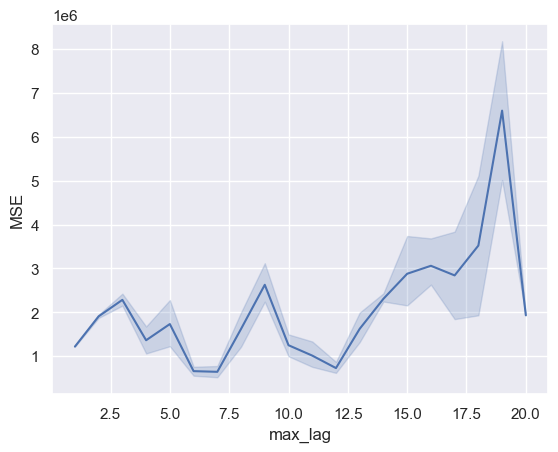

In [30]:
sns.lineplot(data=out, x="max_lag", y="MSE")

LinearRegression

In [31]:
from sklearn.linear_model import LinearRegression
out = pd.DataFrame(np.zeros([max_lag, 2]))
out.columns = ["max_lag", "MSE"]
for lag in range(1, max_lag+1):
    if lag % 5 == 1:
        print("max_lag =", lag)
    X = data_US[["country_lag" + str(l) for l in range(1, lag+1)]].iloc[lag:]
    y = data_US["United States"].iloc[lag:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    model = LinearRegression()
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    out.iloc[lag-1] = [lag,
                       mean_squared_error(y_test, prediction, squared=True)]

max_lag = 1
max_lag = 6
max_lag = 11
max_lag = 16


In [32]:
out.groupby("max_lag").mean().sort_values(by=["MSE"]).head(5)

,MSE
max_lag,
12.0,145010.796259
14.0,170216.642865
13.0,344816.832157
1.0,391805.532625
6.0,445071.275691


Linearregression lower MSE, thus performance better

<Axes: xlabel='max_lag', ylabel='MSE'>

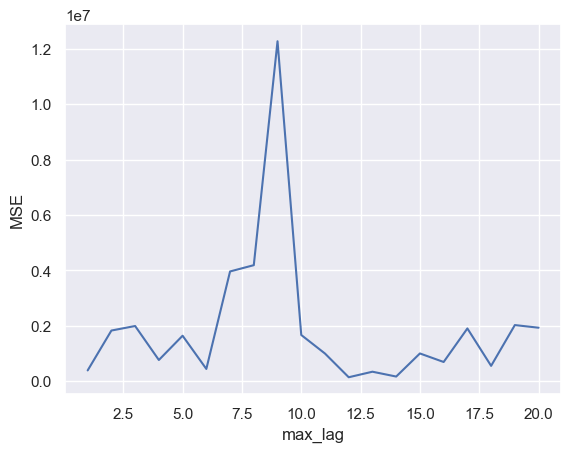

In [33]:
sns.lineplot(data=out, x="max_lag", y="MSE")

#### b)
Now, see if you can improve the prediction with additional data. <br>
In this task, you are supposed to be creative and use your intuition. What could be important predictors? Think of, for example:
- Country characteristics such as population, unemployment rates etc. <br> *Hint: You can search for official statistics, e.g., from OECD.*
- Major historical events such as wars, natural disasters etc. <br> *Hint: You can make dummy variables if such an event happened for given country and year.*
- Geographical information such as continent.

*Note: It is well possible that you can't find data on very small countries. If you don't find data for some countries, you can drop them.*


first I find the additional data which might impact the GDP performance

Inflation:
https://data.oecd.org/price/inflation-cpi.htm#indicator-chart

Unemployment:
https://data.oecd.org/unemp/unemployment-rate.htm

Population:
https://www.oecd-ilibrary.org/social-issues-migration-health/population/indicator/english_d434f82b-en

using United States as an example:


firstly cleaning all the data,which access USA and make year as index

In [34]:
Inflation = pd.read_csv("Inflation.csv")
Inflation=Inflation.rename(columns={"LOCATION":"Country Code","TIME":"year","Value":"Inflation"}).set_index("Country Code")
Inflation_US=Inflation.loc[Inflation.index=="USA",["year","Inflation"]]
Inflation_US=Inflation_US.set_index("year")
Inflation_US = Inflation_US.drop(Inflation_US[Inflation_US.index < 2002].index)
Inflation_US

,Inflation
year,
2002,1.595670
2003,2.297999
2004,2.667572
2005,3.365830
2006,3.222089
2007,2.870550
2008,3.814953
2009,-0.320358
2010,1.636570


In [35]:
unemployment  = pd.read_csv("unemployment.csv")
unemployment=unemployment.rename(columns={"LOCATION":"Country Code","TIME":"year","Value":"Unemployment"}).set_index("Country Code")
unemployment_US=unemployment.loc[unemployment.index=="USA",["year","Unemployment"]]
unemployment_US=unemployment_US.set_index("year")
unemployment_US = unemployment_US.drop(unemployment_US[unemployment_US.index < 2002].index)
unemployment_US


,Unemployment
year,
2002,5.775000
2003,5.991667
2004,5.533333
2005,5.066667
2006,4.616667
2007,4.616667
2008,5.775000
2009,9.266666
2010,9.616667


In [36]:
pop = pd.read_csv("population_new.csv")
pop=pop.rename(columns={"LOCATION":"Country Code","TIME":"year","Value":"Population"}).set_index("Country Code")
pop_US=pop.loc[pop.index=="USA",["year","Population"]]
pop_US=pop_US.set_index("year")
pop_US = pop_US.drop(pop_US[pop_US.index < 2002].index)
pop_US

,Population
year,
2002,287.625193
2003,290.107933
2004,292.805298
2005,295.516599
2006,298.379912
2007,301.231207
2008,304.093966
2009,306.771529
2010,309.327143


In [37]:
co2 = pd.read_csv("GHG_emissions.csv")
co2
co2=co2.rename(columns={"LOCATION":"Country Code","TIME":"year","Value":"CO2"}).set_index("Country Code")
co2_US=co2.loc[co2.index=="USA",["year","CO2"]]
co2_US=co2_US.set_index("year")
co2_US = co2_US.drop(co2_US[co2_US.index < 2002].index)
co2_US

,CO2
year,
2002,19.26
2003,19.31
2004,19.40
2005,19.27
2006,18.75
2007,18.85
2008,18.10
2009,16.67
2010,17.28


merge all the tables, which are the GDP table from original pivot_gdp,and Inflation_US,pop_US,unemploymen_US),
at last have a complete table contains all the Information of USA

In [38]:
GDP_US = pd.merge(data_US, unemployment_US, left_index=True, right_index=True)
GDP_US = pd.merge(GDP_US, pop_US, left_index=True, right_index=True)
GDP_US = pd.merge(GDP_US, Inflation_US, left_index=True, right_index=True)
GDP_US=pd.merge(GDP_US, co2_US, left_index=True, right_index=True)
GDP_US

,United States,country_lag1,country_lag2,country_lag3,country_lag4,country_lag5,country_lag6,country_lag7,country_lag8,country_lag9,...,country_lag15,country_lag16,country_lag17,country_lag18,country_lag19,country_lag20,Unemployment,Population,Inflation,CO2
year,,,,,,,,,,,,,,,,,,,,,
2002,10929.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.775000,287.625193,1.595670,19.26
2003,11456.450,10929.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.991667,290.107933,2.297999,19.31
2004,12217.175,11456.450,10929.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.533333,292.805298,2.667572,19.40
2005,13039.200,12217.175,11456.450,10929.100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.066667,295.516599,3.365830,19.27
2006,13815.600,13039.200,12217.175,11456.450,10929.100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.616667,298.379912,3.222089,18.75
2007,14474.250,13815.600,13039.200,12217.175,11456.450,10929.100,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.616667,301.231207,2.870550,18.85
2008,14769.850,14474.250,13815.600,13039.200,12217.175,11456.450,10929.100,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.775000,304.093966,3.814953,18.10
2009,14478.050,14769.850,14474.250,13815.600,13039.200,12217.175,11456.450,10929.100,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.266666,306.771529,-0.320358,16.67
2010,15048.975,14478.050,14769.850,14474.250,13815.600,13039.200,12217.175,11456.450,10929.100,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.616667,309.327143,1.636570,17.28


create lags for each features

In [39]:
for l in range(1, max_lag+1):
    GDP_US["Unemployment_lag"+str(l)] = GDP_US.Unemployment.shift(l)
    GDP_US["Population_lag"+str(l)] = GDP_US.Population.shift(l)
    GDP_US["Inflation_lag"+str(l)]=GDP_US.Inflation.shift(l)
    GDP_US["CO2_lag"+str(l)]=GDP_US.CO2.shift(l)
GDP_US

C:\Users\Yaqiong Wang\AppData\Local\Temp\ipykernel_6504\2004755003.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  GDP_US["CO2_lag"+str(l)]=GDP_US.CO2.shift(l)
C:\Users\Yaqiong Wang\AppData\Local\Temp\ipykernel_6504\2004755003.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  GDP_US["Unemployment_lag"+str(l)] = GDP_US.Unemployment.shift(l)
C:\Users\Yaqiong Wang\AppData\Local\Temp\ipykernel_6504\2004755003.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

,United States,country_lag1,country_lag2,country_lag3,country_lag4,country_lag5,country_lag6,country_lag7,country_lag8,country_lag9,...,Inflation_lag18,CO2_lag18,Unemployment_lag19,Population_lag19,Inflation_lag19,CO2_lag19,Unemployment_lag20,Population_lag20,Inflation_lag20,CO2_lag20
year,,,,,,,,,,,,,,,,,,,,,
2002,10929.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,11456.450,10929.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,12217.175,11456.450,10929.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,13039.200,12217.175,11456.450,10929.100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,13815.600,13039.200,12217.175,11456.450,10929.100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,14474.250,13815.600,13039.200,12217.175,11456.450,10929.100,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,14769.850,14474.250,13815.600,13039.200,12217.175,11456.450,10929.100,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,14478.050,14769.850,14474.250,13815.600,13039.200,12217.175,11456.450,10929.100,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,15048.975,14478.050,14769.850,14474.250,13815.600,13039.200,12217.175,11456.450,10929.100,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
max_lag=15
from sklearn.linear_model import LinearRegression
out = pd.DataFrame(np.zeros([max_lag+1, 2]))
out.columns = ["max_lag", "MSE"]
for lag in range(max_lag+1):
    if lag % 5 == 0:
        print("max_lag =", lag)
    X = GDP_US[[ "Unemployment", "Population","Inflation","CO2"] + ["country_lag" + str(l)  for l in range(1, lag+1)]  + 
               ["Unemployment_lag" + str(l) for l in range(1, lag+1)] + 
               ["Population_lag" + str(l) for l in range(1, lag+1)]+
               ["Inflation_lag" + str(l) for l in range(1, lag+1)]+
               ["CO2_lag" + str(l) for l in range(1, lag+1)]].iloc[lag:]
    y = GDP_US["United States"].iloc[lag:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    model = LinearRegression()
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    out.iloc[lag] = [lag,
                     mean_squared_error(y_test, prediction, squared=True)]

max_lag = 0
max_lag = 5
max_lag = 10
max_lag = 15


In [41]:
out.set_index("max_lag").sort_values(by=["MSE"]).head(5)

,MSE
max_lag,
12.0,6201.766513
13.0,16186.976566
15.0,28451.550110
5.0,39208.395917
6.0,58632.582514


After adding the additional features Unemployment, Inflation rate,Population,CO2
the performance of the Model improved a lot. which means the unemplomnt,inflation,population,CO2 indictors are correlated to the GDP prediction

In [42]:
# Insert your code here.
#only use previous one year historical data?( population infaltion...) or we also need several years data?

# Problem 4 - Unsupervised Machine Learning 
Use GDP and the information from Problem 3b) to cluster countries. <br>
Which is the optimal number of clusters? <br>
Can you provide an intuition for the clusters you identified?

country,countrycode list:
https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv


pick year 2020 to cluster the countries.
because from the previous found data,we only have the Information of country code,so we need firstly merge the data with corresponding country name.


the war list come from website wisevoter

In [43]:
country_code= pd.read_csv("all.csv")
country_code = dict(zip( country_code['alpha-3'],country_code['name']))


access the original table 2020 GDP data and matching the additional table country code with country name using country_code table,at last access the 2020 data,and combine them together


In [44]:
pivot_gdp_transposed_2020=pivot_gdp.loc[2020].T
pivot_gdp_transposed_2020

Country
Afghanistan            20.136
Albania                15.161
Algeria               145.656
Andorra                 2.885
Angola                 57.139
                       ...   
Vietnam               346.310
West Bank and Gaza     15.532
Yemen                  18.373
Zambia                 18.111
Zimbabwe               26.878
Name: 2020, Length: 196, dtype: float64

In [45]:
co2_new=pd.read_csv("GHG_emissions.csv")
co2_new
co2_new["LOCATION"] = co2_new["LOCATION"].map(country_code)
co2_new=co2_new.rename(columns={'LOCATION':'Country Name','TIME':'year'})
co2_new=co2_new[['Country Name','year','Value']]
co2_new=co2_new.dropna()
co2_new_pivot= co2_new.pivot_table(index='year', columns='Country Name', values='Value')
co2_new_pivot


Country Name,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,...,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United States of America,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1992,0.66,2.03,0.31,3.02,3.10,15.16,7.09,5.75,23.29,0.11,...,27.54,9.51,18.83,1.44,5.16,4.60,0.25,0.68,0.32,1.66
1993,0.61,2.05,0.32,3.07,1.46,15.25,7.05,4.99,24.21,0.11,...,27.42,9.19,19.03,1.34,5.08,4.77,0.29,0.57,0.27,1.50
1994,0.63,1.94,0.31,3.11,0.82,15.44,7.08,4.38,24.15,0.12,...,28.58,9.04,19.07,1.23,4.70,4.69,0.32,0.57,0.23,1.38
1995,0.58,1.92,0.28,3.08,1.05,15.85,7.49,4.21,23.86,0.14,...,28.82,8.86,19.03,1.37,4.15,4.84,0.37,0.63,0.22,1.32
1996,0.59,1.88,0.29,3.35,0.76,16.20,7.95,3.49,24.32,0.14,...,28.64,9.18,19.39,1.58,4.12,5.10,0.41,0.63,0.17,1.25
1997,0.45,1.88,0.29,3.39,1.01,16.45,7.84,3.35,24.11,0.16,...,28.67,8.78,20.15,1.59,4.10,5.20,0.47,0.65,0.22,1.15
1998,0.56,1.91,0.24,3.54,1.06,17.34,7.91,3.32,25.08,0.16,...,27.85,8.80,20.08,1.64,4.67,5.14,0.52,0.69,0.21,1.16
1999,0.94,1.99,0.30,3.55,0.95,17.48,7.69,3.23,24.16,0.16,...,27.18,8.72,19.92,1.94,4.66,4.89,0.51,0.75,0.16,1.30
2000,1.00,1.98,0.28,3.47,1.12,17.59,7.72,3.39,23.82,0.16,...,25.47,8.84,20.29,1.55,4.87,5.01,0.55,0.77,0.16,1.11


In [46]:
Inflation_new = pd.read_csv("Inflation.csv")
Inflation_new
Inflation_new["LOCATION"] = Inflation_new["LOCATION"].map(country_code)
Inflation_new=Inflation_new.rename(columns={'LOCATION':'Country Name','TIME':'year'})
Inflation_new=Inflation_new[['Country Name','year','Value']]
Inflation_new=Inflation_new.dropna()
Inflation_new_pivot= Inflation_new.pivot_table(index='year', columns='Country Name', values='Value')
Inflation_new_pivot

Country Name,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Colombia,Costa Rica,...,Russian Federation,Slovakia,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom of Great Britain and Northern Ireland,United States of America
year,,,,,,,,,,,,,,,,,,,,,
1992,24.899950,0.968829,NaN,2.248641,NaN,NaN,15.425803,NaN,26.945906,21.788228,...,NaN,NaN,NaN,NaN,NaN,2.374367,4.037030,70.076105,4.231997,3.041616
1993,10.611513,1.752190,NaN,2.487607,NaN,1.865449,12.727761,NaN,22.367458,9.781488,...,NaN,NaN,NaN,NaN,4.872252,4.728173,3.292622,66.093846,2.555911,2.969650
1994,4.177338,1.927019,NaN,2.392050,NaN,0.136372,11.443124,24.244966,22.767619,13.534233,...,NaN,NaN,NaN,NaN,4.627007,2.158138,0.852117,105.215004,1.985981,2.595605
1995,3.376099,4.625905,NaN,1.271150,NaN,2.188716,8.232634,16.819834,20.800565,23.185888,...,NaN,NaN,NaN,NaN,4.575812,2.455149,1.799828,89.113309,2.609138,2.805420
1996,0.155678,2.652826,NaN,1.775489,15.757666,1.580200,7.359115,7.878632,20.725441,17.512218,...,47.752014,5.778161,NaN,NaN,3.568820,0.533132,0.811634,80.412143,2.431159,2.936673
1997,0.528588,0.224719,1.163412,1.502879,6.926713,1.611845,6.133867,1.758243,18.407260,13.247698,...,14.761317,6.013710,8.337725,NaN,1.879043,0.658410,0.520225,85.669369,1.816420,2.337566
1998,0.924665,0.859492,0.820632,0.907481,3.195076,0.986812,5.110244,-1.666063,18.623485,11.659511,...,27.685691,6.686369,7.915793,NaN,1.765017,-0.267133,0.017938,84.641336,1.558040,1.547007
1999,-1.166677,1.407929,0.514554,1.134829,4.858447,1.744292,3.336883,-2.236028,10.850021,10.045314,...,85.746487,10.446082,6.114963,NaN,2.232071,0.462176,0.806444,64.867479,1.346762,2.193139
2000,-0.939107,4.457435,1.957076,2.679101,7.044141,2.737636,3.843273,-0.832922,9.221200,10.961225,...,20.798767,12.189709,8.952950,NaN,3.485105,0.899144,1.558529,54.915382,0.797319,3.366683


In [47]:
unemployment_new  = pd.read_csv("unemployment.csv")
unemployment_new["LOCATION"] = unemployment_new["LOCATION"].map(country_code)
unemployment_new=unemployment_new.rename(columns={'LOCATION':'Country Name','TIME':'year'})
unemployment_new=unemployment_new[['Country Name','year','Value']]
unemployment_new=unemployment_new.dropna()
unemployment_new_pivot= unemployment_new.pivot_table(index='year', columns='Country Name', values='Value')
unemployment_new_pivot

Country Name,Australia,Austria,Belgium,Canada,Chile,Colombia,Costa Rica,Czechia,Denmark,Estonia,...,Poland,Portugal,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom of Great Britain and Northern Ireland,United States of America
year,,,,,,,,,,,,,,,,,,,,,
1992,10.728140,NaN,7.091667,11.191670,6.665000,NaN,NaN,NaN,8.600000,NaN,...,NaN,4.125000,NaN,NaN,17.016670,5.558333,NaN,NaN,9.850,7.508333
1993,10.874670,3.958333,8.625000,11.400000,6.542500,NaN,NaN,4.308333,9.550000,NaN,...,NaN,5.500000,NaN,NaN,20.841670,9.050000,NaN,NaN,10.400,6.900000
1994,9.722190,4.241667,9.750000,10.416670,7.815000,NaN,NaN,4.291667,7.700000,NaN,...,NaN,6.825000,NaN,NaN,22.050000,9.358334,NaN,NaN,9.525,6.083333
1995,8.472281,4.241667,9.675000,9.508333,7.302500,NaN,NaN,4.008333,6.716667,NaN,...,NaN,7.183333,NaN,NaN,20.750000,8.800000,NaN,NaN,8.650,5.608333
1996,8.506114,4.733333,9.541667,9.608334,6.325000,NaN,NaN,3.891667,6.333333,NaN,...,NaN,7.241667,NaN,6.891667,19.891670,9.558333,NaN,NaN,8.125,5.416667
1997,8.362488,4.733333,9.216666,9.116667,6.115000,NaN,NaN,4.775000,5.241667,9.625000,...,10.866670,6.741667,NaN,6.916667,18.391670,9.891666,NaN,NaN,7.000,4.950000
1998,7.677429,4.725000,9.341666,8.283334,6.395000,NaN,NaN,6.466667,4.866667,9.150000,...,10.166670,6.100000,12.708330,7.366667,16.408330,8.200000,NaN,NaN,6.275,4.508333
1999,6.873791,4.150000,8.400000,7.591667,10.137500,NaN,NaN,8.700000,5.166667,11.350000,...,13.391670,5.725000,16.491670,7.408333,13.600000,6.733333,NaN,NaN,5.975,4.216667
2000,6.285546,3.933333,6.875000,6.816667,9.667500,NaN,NaN,8.775000,4.325000,14.458330,...,16.075000,5.266667,18.908330,6.741667,11.916670,5.600000,NaN,NaN,5.450,3.991667


In [48]:
pop_new = pd.read_csv("population_new.csv")
pop_new["LOCATION"] = pop_new["LOCATION"].map(country_code)
pop_new=pop_new.rename(columns={'LOCATION':'Country Name','TIME':'year'})
pop_new=pop_new[['Country Name','year','Value']]
pop_new=pop_new.dropna()
pop_new_pivot= pop_new.pivot_table(index='year', columns='Country Name', values='Value')
pop_new_pivot

Country Name,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Colombia,...,Singapore,Slovakia,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom of Great Britain and Northern Ireland,United States of America
year,,,,,,,,,,,,,,,,,,,,,
1992,33.475005,17.478635,7.840709,10.045165,153.973883,8.540164,28.371264,13.737062,1183.813388,35.520940,...,2.849754,5.306539,1.995832,41.760754,39.147940,8.668065,6.875364,56.986000,57.584530,256.514224
1993,33.917440,17.634808,7.905632,10.084479,156.454116,8.472313,28.684764,13.956766,1195.855556,36.207108,...,2.904547,5.324632,1.990623,42.525439,39.356082,8.718558,6.938265,57.913000,57.713889,259.918588
1994,34.353066,17.805468,7.936118,10.115601,158.910651,8.443591,29.000663,14.171821,1207.286676,36.853905,...,2.959350,5.347413,1.988850,43.267984,39.547353,8.780741,6.993795,58.837000,57.862145,263.125821
1995,34.779096,18.004882,7.948278,10.136814,161.345581,8.406067,29.302311,14.381249,1218.144424,37.472184,...,3.013515,5.363676,1.987505,43.986086,39.718895,8.826944,7.040687,59.756000,58.024799,266.278393
1996,35.195575,18.224767,7.959016,10.156641,163.767821,8.362826,29.610218,14.584947,1228.298839,38.068050,...,3.068132,5.373793,1.991169,44.661605,39.884246,8.840999,7.071851,60.671000,58.164374,269.394284
1997,35.604362,18.423037,7.968041,10.181246,166.187066,8.312068,29.905948,14.782706,1237.801448,38.635691,...,3.123403,5.383233,1.986848,45.285047,40.049974,8.846059,7.088906,61.582000,58.314249,272.646925
1998,36.005387,18.607584,7.976789,10.203012,168.606400,8.256786,30.155173,14.974898,1246.836105,39.184456,...,3.180018,5.390866,1.982603,45.852167,40.214066,8.850975,7.110002,62.464000,58.474943,275.854104
1999,36.398577,18.812264,7.992323,10.226419,171.029011,8.210624,30.401286,15.162353,1255.433238,39.730798,...,3.229681,5.395324,1.985557,46.364679,40.369667,8.857879,7.143991,63.364000,58.684427,279.040168
2000,36.783859,19.028802,8.011566,10.251251,173.765726,8.170172,30.685730,15.343326,1264.099070,40.295563,...,3.273363,5.400679,1.990272,46.813268,40.554387,8.872112,7.184250,64.268751,58.886065,282.162411


there are many values can't match due to different country writing way,but some important data from some countries like below, I just manually revise the country name for more crucial data.

In [49]:
column_mapping = {
    'United States of America': 'United States',
     "China" : "China, People's Republic of",
     "United Kingdom of Great Britain and Northern Ireland":"United Kingdom",
     "Viet Nam":"Vietnam",}
tables = [co2_new_pivot, unemployment_new_pivot, pop_new_pivot,Inflation_new_pivot]  # Replace ... with other DataFrames if present

for table in tables:
    table.rename(columns=column_mapping, inplace=True)

In [50]:
co2_new_pivot_transposed_2020=co2_new_pivot.loc[2020].T
co2_new_pivot_transposed_2020.name="CO2"

In [51]:
unemployment_new_pivot_transposed_2020=unemployment_new_pivot.loc[2020].T
unemployment_new_pivot_transposed_2020.name="unemplyment"

In [52]:
Inflation_new_pivot_transposed_2020=Inflation_new_pivot.loc[2020].T
Inflation_new_pivot_transposed_2020.name="inflation"

In [53]:
pop_new_pivot_transposed_2020=pop_new_pivot.loc[2020].T
pop_new_pivot_transposed_2020.name="pop"

In [54]:
war = pd.read_csv("War_data.csv").set_index("Country")

unemployment table has relatively few data, which impact the afterward analyse, so I drop this table

In [55]:
GDP_all = pd.merge(pivot_gdp_transposed_2020, pop_new_pivot_transposed_2020, left_index=True, right_index=True)
GDP_all=pd.merge(GDP_all, Inflation_new_pivot_transposed_2020, left_index=True, right_index=True)
GDP_all=pd.merge(GDP_all, co2_new_pivot_transposed_2020, left_index=True, right_index=True)

GDP_all.rename(columns={2020: "gdp"}, inplace=True)
GDP_all

,gdp,pop,inflation,CO2
Argentina,389.064,45.376763,40.404760,3.28
Australia,1360.687,25.693267,0.868432,14.57
Austria,434.877,8.916845,1.388067,6.43
Belgium,524.791,11.506938,0.427625,7.17
Brazil,1476.092,211.755692,3.211768,1.83
Canada,1647.598,38.037204,0.723216,13.36
Chile,254.276,19.458310,3.045491,4.31
"China, People's Republic of",14862.564,1424.929783,2.490399,7.15
Colombia,270.151,50.911747,2.526294,1.48
Costa Rica,62.382,5.111238,0.724842,1.29


In [56]:
GDP_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Argentina to United States
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gdp        42 non-null     float64
 1   pop        42 non-null     float64
 2   inflation  42 non-null     float64
 3   CO2        42 non-null     float64
dtypes: float64(4)
memory usage: 1.6+ KB


scalar the data first

In [57]:
from sklearn.preprocessing import StandardScaler
GDP_all.columns = GDP_all.columns.astype(str)
cols_to_scale = ["gdp", 'pop', 'inflation', 'CO2']
cols = GDP_all[cols_to_scale]
scaler = StandardScaler()
scaled_values = scaler.fit_transform(cols)
GDP_all[cols_to_scale] = scaled_values
GDP_all

,gdp,pop,inflation,CO2
Argentina,-0.355949,-0.232850,6.203327,-0.788200
Australia,-0.103027,-0.298770,-0.202738,2.722168
Austria,-0.344023,-0.354954,-0.118541,0.191220
Belgium,-0.320618,-0.346280,-0.274162,0.421306
Brazil,-0.072986,0.324350,0.176953,-1.239045
Canada,-0.028342,-0.257430,-0.226267,2.345946
Chile,-0.391035,-0.319651,0.150011,-0.467945
"China, People's Republic of",3.411624,4.387249,0.060069,0.415088
Colombia,-0.386903,-0.214314,0.065886,-1.347869
Costa Rica,-0.440987,-0.367699,-0.226003,-1.406946


combine the data with dummy variable from war table

In [58]:
GDP_all=pd.merge(GDP_all, war, left_index=True, right_index=True,how="left")
GDP_all

,gdp,pop,inflation,CO2,War
Argentina,-0.355949,-0.232850,6.203327,-0.788200,0
Australia,-0.103027,-0.298770,-0.202738,2.722168,0
Austria,-0.344023,-0.354954,-0.118541,0.191220,0
Belgium,-0.320618,-0.346280,-0.274162,0.421306,0
Brazil,-0.072986,0.324350,0.176953,-1.239045,0
Canada,-0.028342,-0.257430,-0.226267,2.345946,0
Chile,-0.391035,-0.319651,0.150011,-0.467945,0
"China, People's Republic of",3.411624,4.387249,0.060069,0.415088,0
Colombia,-0.386903,-0.214314,0.065886,-1.347869,1
Costa Rica,-0.440987,-0.367699,-0.226003,-1.406946,0


using PCA to reduce dimension

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(GDP_all)
print("Share of variance explained by each component:", pca.explained_variance_ratio_*100)
print("Share of variance explained by all components:", sum(pca.explained_variance_ratio_*100))


Share of variance explained by each component: [39.78684673 30.03578725 20.75610871  7.80300949  1.61824782]
Share of variance explained by all components: 99.99999999999999


plot elbow method for PCA

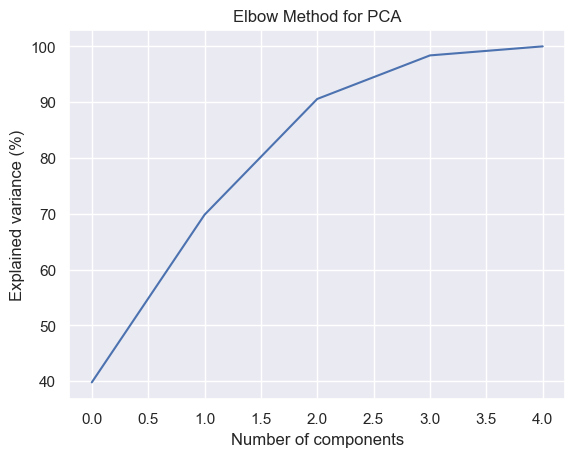

In [60]:
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.title("Elbow Method for PCA")
plt.show()

using K-means clustering to find the optimum K

In [61]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init="auto") #number of interation
    kmeans.fit(GDP_all)
    distortions.append(kmeans.inertia_)

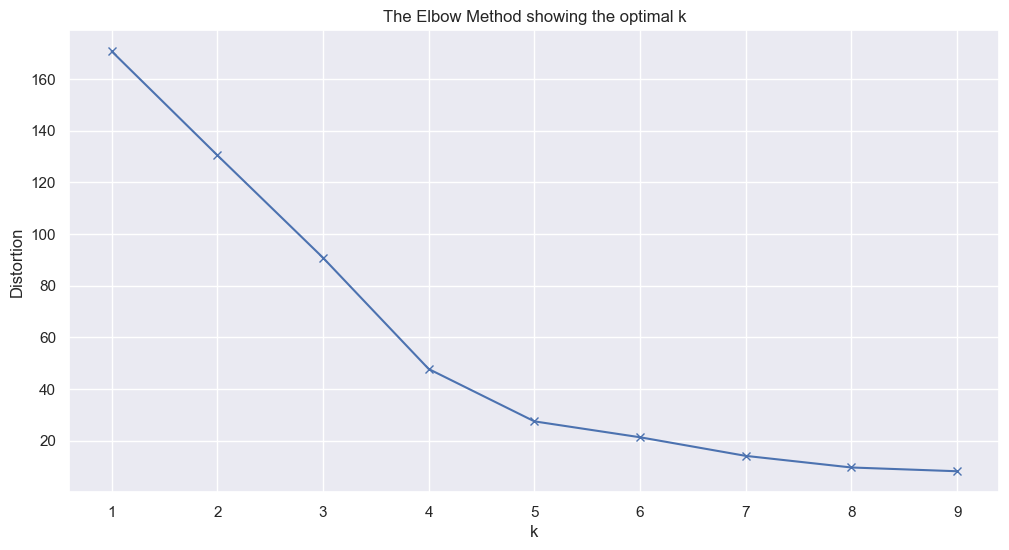

In [62]:
plt.figure(figsize=(12,6))
plt.plot(K, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing the optimal k")
plt.show()

The elbow point appears to be at  𝑘=5

In [63]:
# Insert your code here.
#using elbow method
# interpretation 

Compare the clustering results when using the full dataset to when using the reduced dimensionality datasets with PCA.
In particular, apply the elbow method and compare the plots.

In [64]:
GDP_all_pca_list = []
components = [1, 3, 4]
for n in components:
    pca = PCA(n_components=n+1)
    pca.fit(GDP_all)
    GDP_all_pca_list.append(pca.transform(GDP_all))

In [65]:
distortions_list = []
K = range(1,20)
for i, n in enumerate(components):
    distortions = []
    for k in K:
        kmeans = KMeans(n_clusters=k, n_init="auto")
        kmeans.fit(GDP_all_pca_list[i])
        distortions.append(kmeans.inertia_)
    distortions_list.append(distortions)

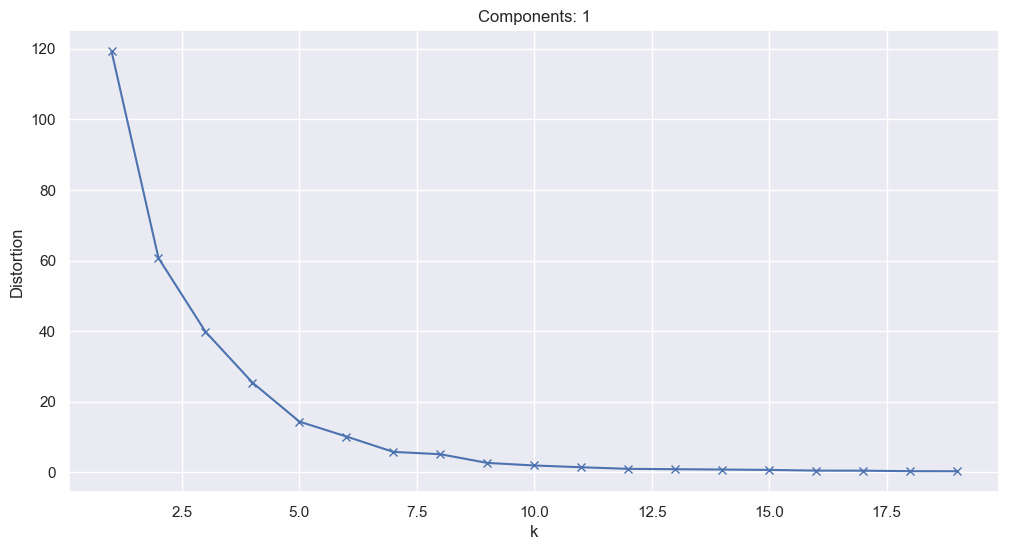

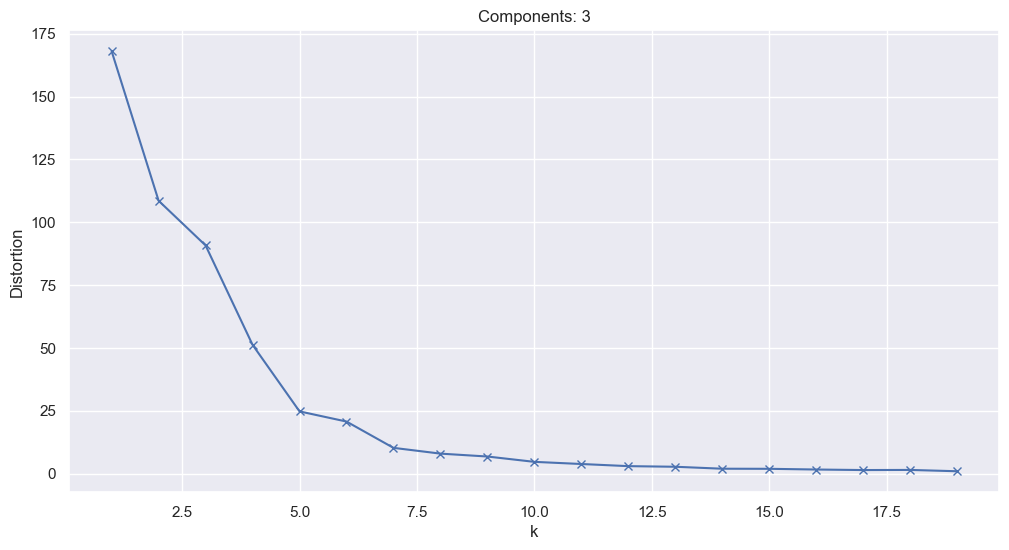

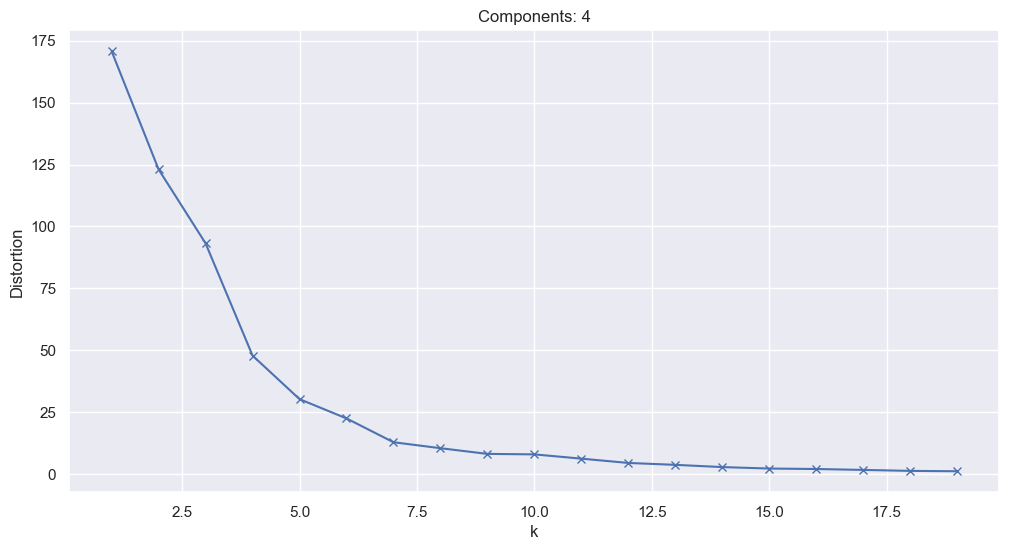

In [66]:
figs = []
for i, n in enumerate(components):
    fig = plt.figure(figsize=(12,6))
    plt.plot(K, distortions_list[i], "bx-")
    plt.ylabel("Distortion")
    plt.title("Components: " + str(n))
    plt.xlabel("k")
    figs.append(fig)
#PCA make sense, the result is similar as K-means cluster k=5

The optimum number of clusters remians be 5